<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="1_7_OLCI_light_environment.ipynb" target="_blank"><< Assessing the light environment</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-olci"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=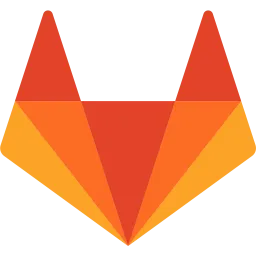" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?term=learn%20olci&sort=score%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-3%7COLCI%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=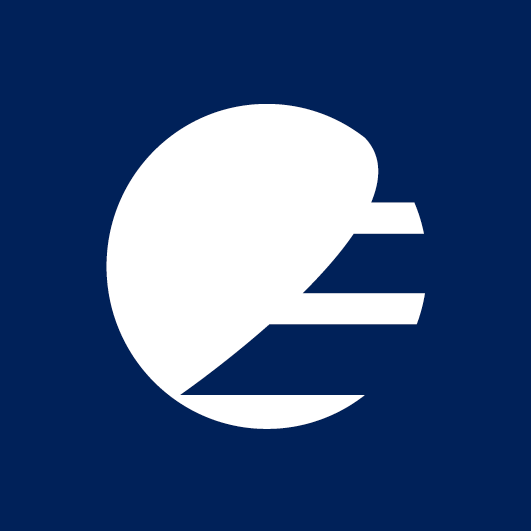" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-olci/HEAD?labpath=1_OLCI_introductory%2F1_7_OLCI_light_environment.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-olci/1_OLCI_introductory/1_7_OLCI_light_environment.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Launch on WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_OLCI_data_access_Data_Store.ipynb" target="_blank">1_1a_OLCI_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_OLCI_data_access_HDA.ipynb" target="_blank">1_1b_OLCI_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.7 Exploring OLCI inherent optical property products

### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level 2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* ...


### Outline

...

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Inherent optical properties (IOPs)](#section1)
 1. [Absorption and backscatter](#section2)
 1. [Plotting ternary diagrams](#section3)
 1. [Applying your knowledge](#section4)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [ ]:
import xarray as xr                 # a library that supports the use of multi-dimensional arrays in Python
import os                           # a library that allows us access to basic operating system commands like making directories
import matplotlib.pyplot as plt     # a library that support plotting
import eumartools                   # a EUMETSAT library that support working with Sentinel-3 products
import numpy as np                  # a library that provides support for array-based mathematics
import mpltern # <<<< add to env    # a package that supports plotting ternary diagrams
import warnings                     # a library that helps us manage warnings
warnings.filterwarnings('ignore')

# set plot font size
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Inherent optical properties (IOPs)
[Back to top](#TOC_TOP)

</div>

https://www.eumetsat.int/S3-OLCI-IOP

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Absorption and backscatter
[Back to top](#TOC_TOP)

</div>

In [2]:
fname = "S3A_OL_2_WFR____20241007T111859_20241007T112159_20241007T131717_0179_117_365_2520_MAR_O_NR_003.SEN3"
subsample = 10

In [3]:
ds = xr.open_mfdataset(os.path.join(os.getcwd(), fname, "iop_lsd.nc"))
ds_loc = xr.open_mfdataset(os.path.join(os.getcwd(), fname, "geo_co*.nc"))
ds_flags = os.path.join(os.getcwd(), fname, "wqsf.nc")

In [9]:
# https://user.eumetsat.int/s3/eup-strapi-media/Recommendations_for_Sentinel_3_OLCI_Ocean_Colour_product_validations_in_comparison_with_in_situ_measurements_Matchup_Protocols_V8_B_e6c62ce677.pdf

NN_mask = eumartools.flag_mask(ds_flags, 'WQSF', ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN', 
                                                    'INVALID', 'COSMETIC', 'SATURATED', 'SUSPECT',
                                                    'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE'])

In [5]:
ds

<xarray.Dataset> Size: 716MB
Dimensions:    (rows: 4091, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    OWC        (rows, columns) float32 80MB dask.array<chunksize=(1364, 1622), meta=np.ndarray>
    acdm_443   (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    acdom_443  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    anw_443    (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    aphy_443   (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    bbp_443    (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    bbp_slope  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    iop_flags  (rows, columns) float32 80MB dask.array<chunksize=(1364, 1622), meta=np.ndarray>
    kd_490     (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
Attributes: (12/17)
    absolute_orbit_number:  44998
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2024-10-07T13:17:17Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r5 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.05
    start_time:             2024-10-07T11:18:58.980542Z
    stop_time:              2024-10-07T11:21:58.945537Z
    title:                  OLCI Level 2 WATER Product, 3SAA Inherent Optical...

In [6]:
NN_mask = NN_mask.astype(float)[::subsample, ::subsample]
NN_mask[NN_mask == 0.0] = np.nan

iop_flags = np.array(ds.iop_flags[::subsample, ::subsample])
iop_flags[iop_flags != 0] = np.nan
iop_flags[iop_flags == 0] = 1

Axes: absorption

https://www.sciencedirect.com/science/article/pii/S0034425721002571?via%3Dihub
acdm(λ) = anap(λ) + acdom(λ)

1. a_cdom(λ)
2. a_phy(λ)
3. anap(λ) = acdm(λ) - acdom(λ)

Sub A_nap with Bbp?

In [7]:
a_cdom = 10**np.array(ds.acdom_443[::subsample, ::subsample]*NN_mask*iop_flags)
a_phy = 10**np.array(ds.aphy_443[::subsample, ::subsample]*NN_mask*iop_flags)
a_nap = 10**np.array(ds.acdm_443[::subsample, ::subsample]*NN_mask*iop_flags) - np.array(ds.acdom_443[::subsample, ::subsample]*NN_mask*iop_flags)

a_tot = a_cdom + a_nap + a_phy

a_cdom = a_cdom/a_tot/3
a_nap = a_nap/a_tot/3
a_phy = a_phy/a_tot/3

a_cdom[a_cdom < 0.0] = np.nan
a_nap[a_nap < 0.0] = np.nan
a_phy[a_phy < 0.0] = np.nan

for x in [a_cdom, a_nap, a_phy]:
    print(np.nanmin(x), np.nanmax(x))

2.2498065166711023e-07 0.29759410888399057
0.0007520904989083308 0.33331567330078865
1.626689134742558e-07 0.22206029006471117


<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Plotting ternary diagrams
[Back to top](#TOC_TOP)

</div>

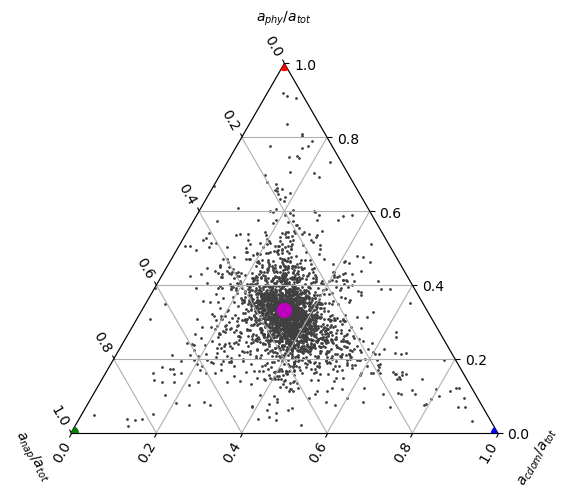

In [8]:
# https://www.researchgate.net/publication/330892305/figure/fig5/AS:11431281250840264@1718047163024/Ternary-diagrams-of-contribution-by-optically-active-constituents-to-total-nonwater.png

ax = plt.subplot(projection="ternary")

# CORNER LABELLING!
ax.set_tlabel("$a_{phy}/a_{tot}$")
ax.set_llabel("$a_{nap}/a_{tot}$")
ax.set_rlabel("$a_{cdom}/a_{tot}$")

points_t = [1.00, 0.00, 0.00]
points_l = [0.00, 1.00, 0.00]
points_r = [0.00, 0.00, 1.00]
points_c = [0.33, 0.33, 0.33]

pc = ax.scatter(a_phy, a_nap, a_cdom, s=1, c="0.25")
pc = ax.scatter(points_t[0], points_t[1], points_t[2], s=100, c="r", zorder=10)
pc = ax.scatter(points_l[0], points_l[1], points_l[2], s=100, c="g", zorder=10)
pc = ax.scatter(points_r[0], points_r[1], points_r[2], s=100, c="b", zorder=10)
pc = ax.scatter(points_c[0], points_c[1], points_c[2], s=100, c="m", zorder=10)

ax.grid()

plt.show()

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Applying your knowledge
[Back to top](#TOC_TOP)

</div>

### What to try next?

* ????

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="1_7_OLCI_light_environment.ipynb" target="_blank"><< Assessing the light environment</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>